<a href="https://colab.research.google.com/github/Arko04/Colab/blob/main/AI_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mount my google drive

In [2]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


###   Import "Image" class to display image

In [3]:
from IPython.display import Image

# **Part 1: Unsupervised Learning**

## **Introduction**

In real world, not every data we work upon has a **target variable** or **label**. This kind of data **cannot be analyzed using supervised learning** algorithms. We need the help of **unsupervised algorithms**. One of the most popular type of analysis under unsupervised learning is **Cluster analysis**. When the goal is to **group similar data points in a dataset**, then we use cluster analysis.

## **What is Clustering?**
The task of grouping data points (actually unlabelled data) based on their similarity with each other is called Clustering or Cluster Analysis.

A cluster is nothing but a collection of similar data which is grouped together.

 It evaluates the similarity **based on a metric** like **Euclidean distance, Cosine similarity, Manhattan distance**, etc. and then group the points with highest similarity score together.

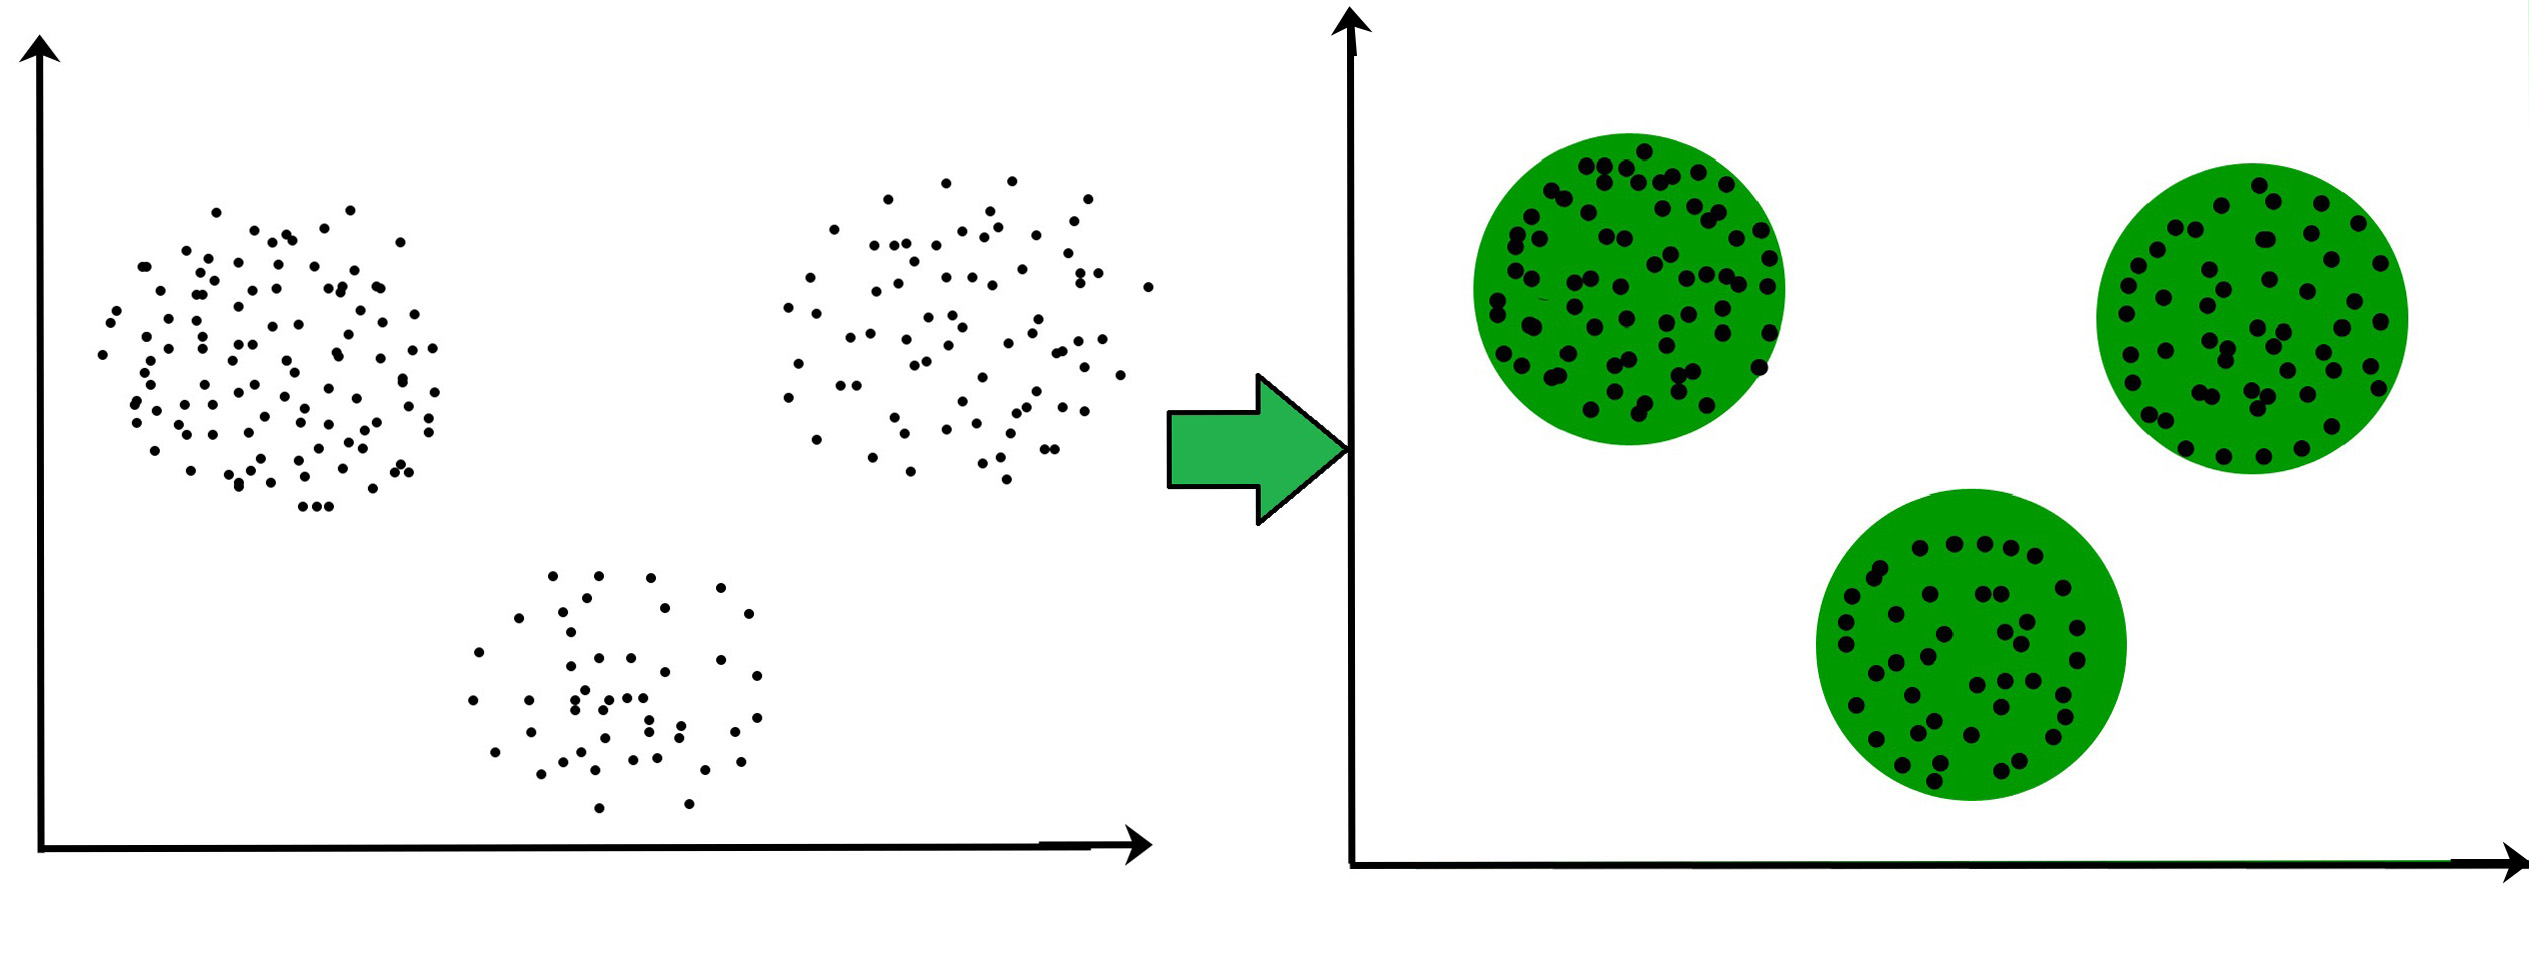

In [4]:
Image(filename='/content/grive/MyDrive/Slides/Project2/cluster1.jpeg', width=800,height=350)

source: https://www.geeksforgeeks.org/clustering-in-machine-learning/

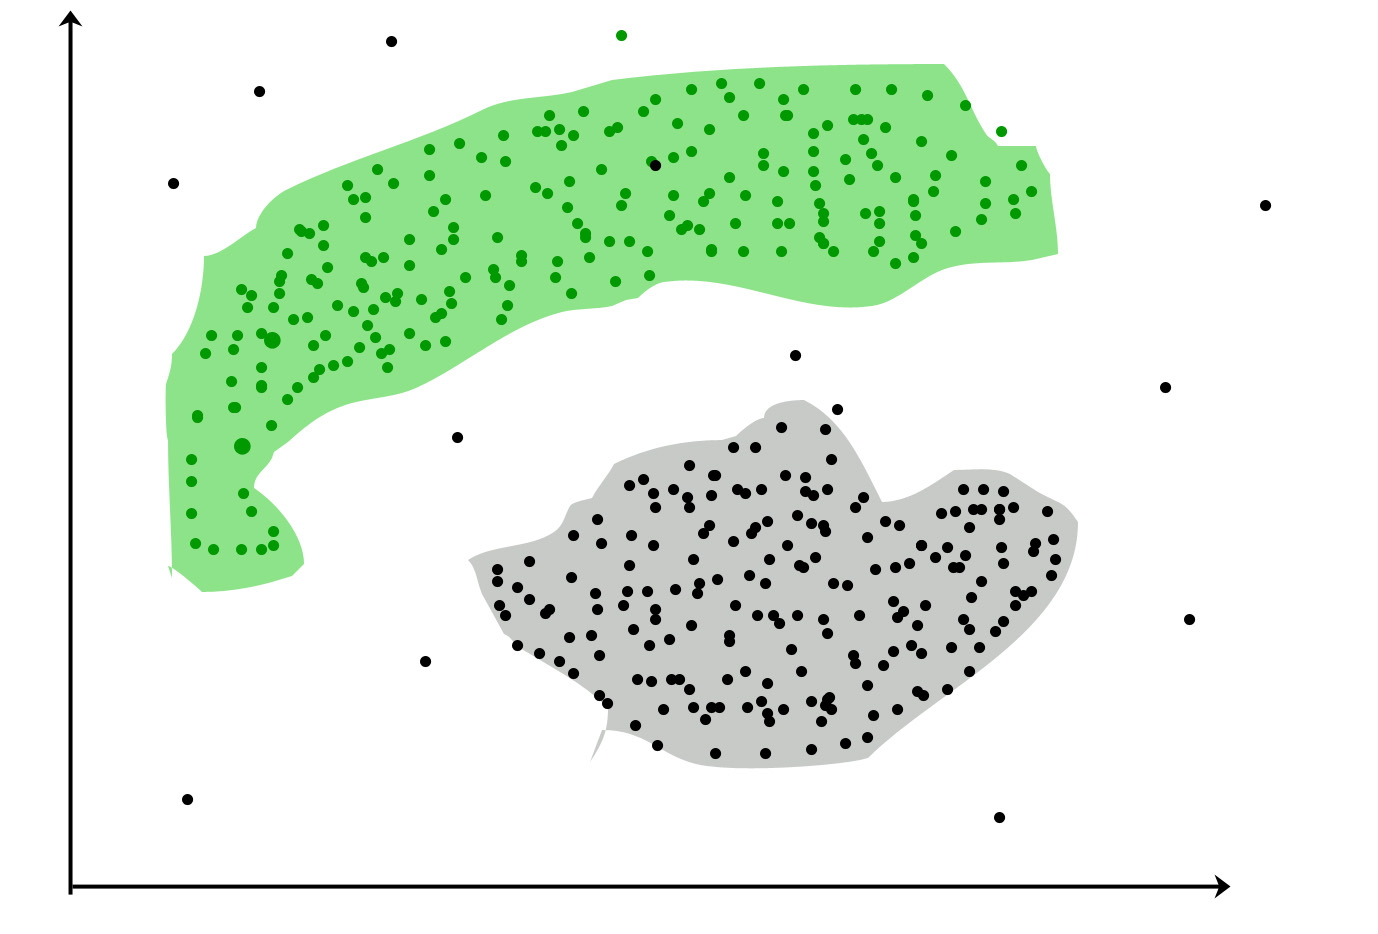

In [5]:
Image(filename='/content/grive/MyDrive/Slides/Project2/cluster2.jpeg', width=800,height=500)

source: https://www.geeksforgeeks.org/clustering-in-machine-learning/

Here we are going to get familiar with two common kinds of clustering.

## **1_1: Mathematical intuition behind the two kinds of clustering**

## **1_1_1: Hierarchical Clustering**

Hierarchical clustering organizes data points into a hierarchy of clusters (**dendrogram**).

## **1_1_1_1: two types of hierarchical clustering**

* **Agglomerative clustering** begins by treating each data point as a separate cluster and then iteratively merges similar clusters until a stopping criterion (e.g. Number of Clusters, Distance Threshold, etc) is met.

* **Divisive clustering**, on the other hand, starts with a single cluster and recursively splits it into smaller clusters until a certain condition is fulfilled.

## **1_1_1_2: Distance Metrics**

Commonly used metrics include **Euclidean distance**, **Manhattan distance**, and **Pearson correlation coefficient**.

These metrics **determine the similarity or dissimilarity** between data points and **influence the formation of clusters**.

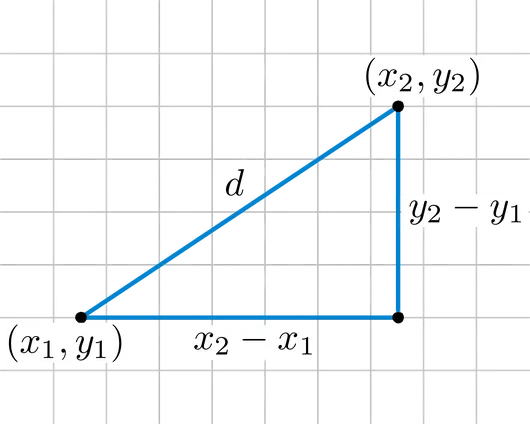

In [15]:
Image(filename='/content/grive/MyDrive/Slides/Project2/2_dimentional_distance.png', width=600,height=500)

source: https://medium.com/@khwabkalra1/unraveling-the-power-of-hierarchical-clustering-edd25eb5326d

### **Distances:**
### Euclidean Distance:

$$d(x, y) = \sqrt { (x_2 - x_1)^2 + (y_2 - y_1)^2}$$

### Manhattan Distance:
$$d(x, y) = |x_2 - x_1| + |y_2 - y_1| $$

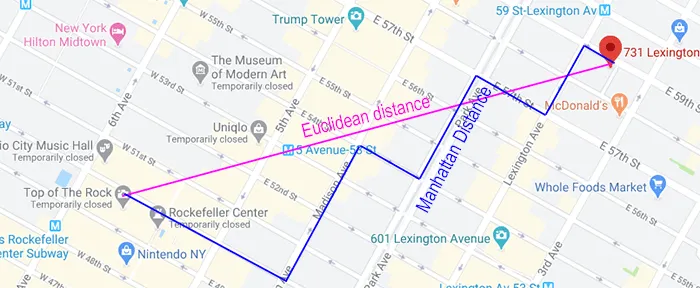

In [10]:
Image(filename='/content/grive/MyDrive/Slides/Project2/distance.png', width=800,height=300)

source: https://medium.com/@khwabkalra1/unraveling-the-power-of-hierarchical-clustering-edd25eb5326d

## **1_1_1_3: Agglomerative clustering**

### Steps

1. **Initialization**: Treat each data point as a single cluster (i.e., each cluster contains only one point).


2. **Distance Matrix**: Compute the initial distance matrix for all pairs of clusters.


3. **Merge Clusters**: Identify the pair of clusters with the smallest distance between them and merge them into a single cluster.


4. **Update Distance Matrix**: Recalculate the distances between the new cluster and all remaining clusters using the chosen linkage method.


5. **Repeat**: Continue merging the closest clusters until all data points are merged into a single cluster or until a stopping criterion (e.g. the desired number of clusters) is obtained.


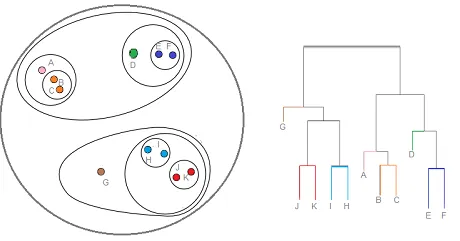

In [24]:
Image(filename='/content/grive/MyDrive/Slides/Project2/Agglomerative clustering.png', width=550,height=250)

source: https://medium.com/@rohit_batra/the-math-behind-the-k-means-and-hierarchical-clustering-algorithm-1d9a36a56c08

Although it is easy to find the distance between two points,

how to calculate the distance between two clusters with several points?

## **Linkage Methods**

Linkage methods define how the distance between clusters is measured during the merging process.

* single linkage (minimum distance)

* complete linkage (maximum distance)

* average linkage (average distance)

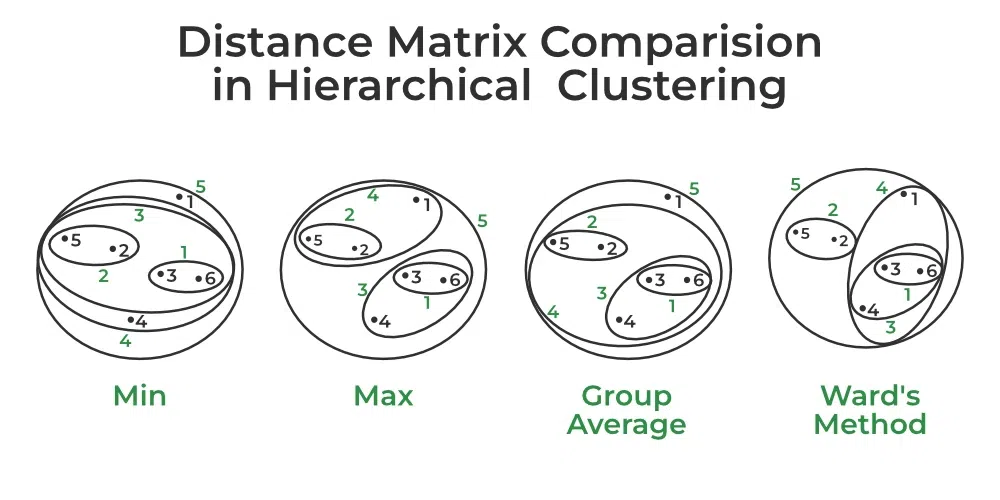

In [27]:
Image(filename='/content/grive/MyDrive/Slides/Project2/linkage.png', width=850,height=450)

source: https://www.geeksforgeeks.org/hierarchical-clustering/

### **Example:**

Five data points in a two-dimentional space:

### Data Points

\begin{align*}
P1 & : (1, 2) \\
P2 & : (2, 3) \\
P3 & : (6, 7) \\
P4 & : (8, 8) \\
P5 & : (5, 6) \\
\end{align*}


### Step-by-Step Process

#### 1. Initial Distance Matrix
Using Euclidean distance:

\begin{array}{c|ccccc}
& P1 & P2 & P3 & P4 & P5 \\
\hline
P1 & 0 & 1.41 & 7.21 & 9.21 & 6.40 \\
P2 & 1.41 & 0 & 5.83 & 8.06 & 5.00 \\
P3 & 7.21 & 5.83 & 0 & 2.83 & 1.41 \\
P4 & 9.21 & 8.06 & 2.83 & 0 & 3.61 \\
P5 & 6.40 & 5.00 & 1.41 & 3.61 & 0 \\
\end{array}


#### 2. Merge Closest Clusters
The closest pair is $P1$ and $P2$ with a distance of 1.41. Merge $P1$ and $P2$ into a single cluster $C1$.

#### 3. Update Distance Matrix
Calculate the distances between the new cluster $C1$ and the remaining points using single linkage:


\begin{array}{c|cccc}
& C1 & P3 & P4 & P5 \\
\hline
C1 & 0 & 5.83 & 8.06 & 5.00 \\
P3 & 5.83 & 0 & 2.83 & 1.41 \\
P4 & 8.06 & 2.83 & 0 & 3.61 \\
P5 & 5.00 & 1.41 & 3.61 & 0 \\
\end{array}


#### 4. Merge Closest Clusters
The closest pair is now $P3$ and $P5$ with a distance of 1.41. Merge $P3$ and $P5$ into a single cluster $C2$.

#### 5. Update Distance Matrix
Calculate the distances between the new cluster $C2$ and the remaining clusters:


\begin{array}{c|ccc}
& C1 & C2 & P4 \\
\hline
C1 & 0 & 5.00 & 8.06 \\
C2 & 5.00 & 0 & 2.83 \\
P4 & 8.06 & 2.83 & 0 \\
\end{array}


#### 6. Merge Closest Clusters
The closest pair is now $C2$ (which includes $P3$ and $P5$) and $P4$ with a distance of 2.83. Merge $C2$ and $P4$ into a single cluster $C3$.

#### 7. Update Distance Matrix
Calculate the distances between the new cluster $C3$ and $C1$:


\begin{array}{c|cc}
& C1 & C3 \\
\hline
C1 & 0 & 5.00 \\
C3 & 5.00 & 0 \\
\end{array}


#### 8. Merge Closest Clusters
The closest pair is now $C1$ (which includes $P1$ and $P2$) and $C3$ (which includes $P3$, $P4$, and $P5$) with a distance of 5.00. Merge $C1$ and $C3$ into a single cluster $C4$.

At this point, all data points are merged into a single cluster, and the process is complete.



                  _____________C4_____________
                 |                            |
         _______C1_______                ____C3____
        |               |              |           |
       P1              P2           ____C2____     P4
                                     |       |
                                    P3      P5


This example was provided by [GPT-4o](https://chatgpt.com/)

### **Implement in code**

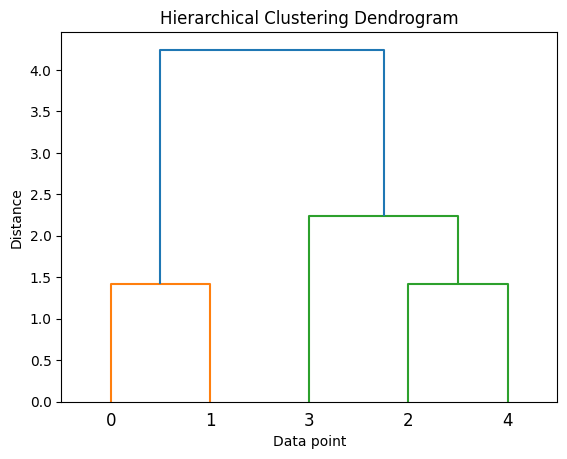

In [43]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# randomly chosen dataset
X = np.array([[1, 2], [2, 3], [6, 7],
			[8, 8], [5, 6]])

# Perform hierarchical clustering
Z = linkage(X, 'single')

# Plot dendrogram
dendrogram(Z)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.show()


Usually we do this clustering until a stopping criterion or level. For instance, in the follwing case, you can identify 4 distinct clusters where we have cut the dendrogram.

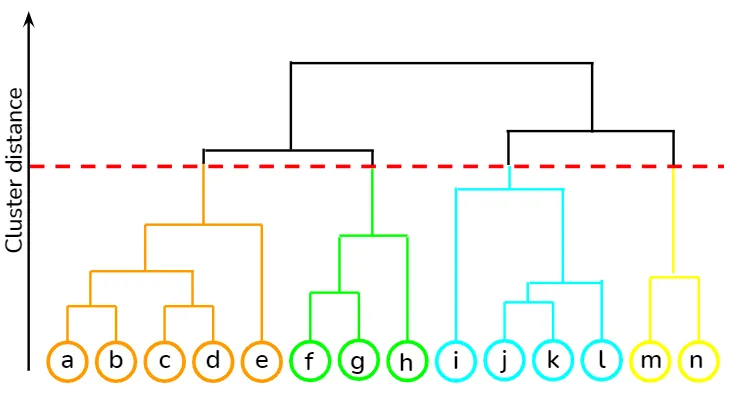

In [31]:
Image(filename='/content/grive/MyDrive/Slides/Project2/stopping-criterion.png', width=600,height=400)

source: https://medium.com/@rohit_batra/the-math-behind-the-k-means-and-hierarchical-clustering-algorithm-1d9a36a56c08

### **1_1_2: Density-Based Spatial Clustering of Applications with Noise (DBSCAN)**

 the algorithm uses the distance between different points in the dataset to form clusters.

#### **The algorithm uses two parameters, minPts and ε.**

* **ε (epsilon):** The maximum distance between two points for them to be considered as part of the same cluster.

* **minPts:**  The minimum number of points that are required to form a cluster

### **Key concepts of DBSCAN:**

### **Core Points**
A **core point** is a point that has at least `minPts` points within a distance `ε` (epsilon) from it, including the point itself. Core points are essential to forming clusters in DBSCAN.

### **Directly Reachable**
A point $q$ is **directly reachable** from a core point $p$ if $q$ is within distance $ε$ from $p$. Direct reachability is only defined with respect to core points.

### **Reachable**
A point $q$ is **reachable** from a point $p$ if there is a path of directly reachable points starting from $p$ and ending at $q$. This means that $q$ can be reached from $p$ through a series of intermediate core points.

### **Outliers or Noise Points**
Points that are not reachable from any other point are considered outliers or **noise points**. These points do not belong to any cluster and are isolated.

### **Forming Clusters**
If $p$ is a core point, it forms a cluster with all points (core or non-core) that are reachable from it. Each cluster contains at least one core point. Non-core points that are reachable from core points are considered part of the cluster's "edge".

### **Density-Connected**
Reachability is not a symmetric relation: by definition, only core points can reach non-core points. The opposite is not true, so a non-core point may be reachable, but nothing can be reached from it.

Two points $p$ and $q$ are **density-connected** if there is a point $o$ such that both $p$ and $q$ are reachable from $o$. Density-connectedness is symmetric and ensures the connectedness of clusters.

### **Summary of DBSCAN Algorithm**

1. **Identify Core Points**: Determine which points are core points based on the parameters `ε` and `minPts`.

2. **Form Clusters**: Starting from each core point, form clusters by finding all points that are reachable from the core point (e.g. you can use a breadth-first search (BFS) or depth-first search (DFS)).

3. **Assign Non-Core Points**: Include non-core points that are reachable from core points into their respective clusters.

4. **Identify Noise Points**: Mark points that are not reachable from any core point as noise points.


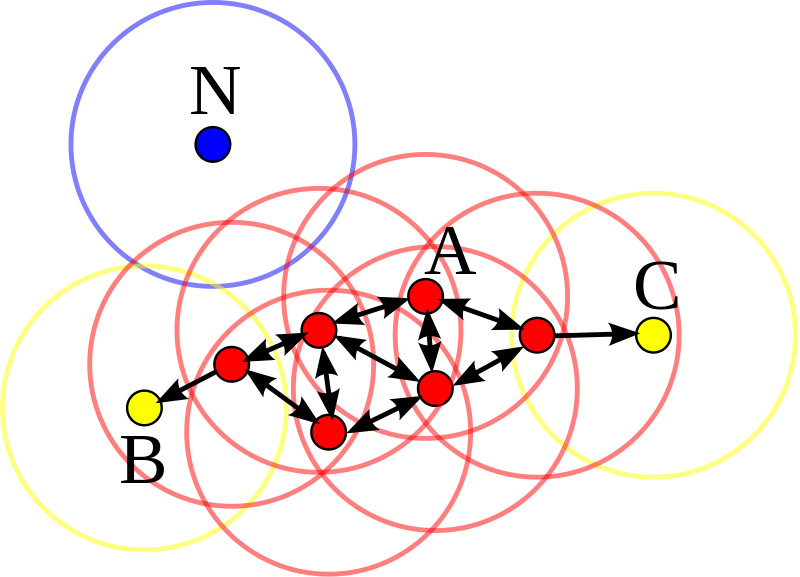

In [48]:
Image(filename='/content/grive/MyDrive/Slides/Project2/DBSCAN-Illustration.png', width=450,height=300)

source: https://en.wikipedia.org/wiki/DBSCAN#:~:text=It%20is%20a%20density%2Dbased,neighbors%20are%20too%20far%20away).

In the above diagram, minPts = 4. Point A and the other red points are core points, because the area surrounding these points in an ε radius contain at least 4 points (including the point itself). Because they are all reachable from one another, they form a single cluster. Points B and C are not core points, but are reachable from A (via other core points) and thus belong to the cluster as well. Point N is a noise point that is neither a core point nor directly-reachable.

### **Implement with code**

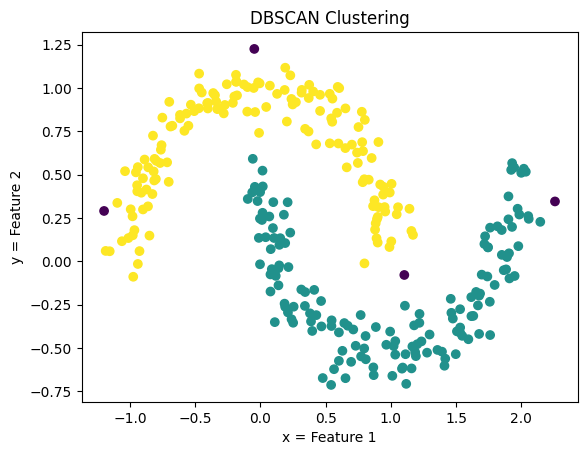

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Generate synthetic data
X, _ = make_moons(n_samples=300, noise=0.1, random_state=0)

# Create DBSCAN instance
dbscan = DBSCAN(eps=0.16, min_samples=5)

# Fit the model and predict the clusters
labels = dbscan.fit_predict(X)

# Plot the results
plt.scatter(
    X[:, 0],  # x-coordinates of the points
    X[:, 1],  # y-coordinates of the points
    c=labels  # color-coding the points based on cluster labels
)

plt.title('DBSCAN Clustering')
plt.xlabel('x = Feature 1')
plt.ylabel('y = Feature 2')
plt.show()


sources:

https://www.geeksforgeeks.org/hierarchical-clustering-in-data-mining/

---
https://www.geeksforgeeks.org/data-mining-cluster-analysis/


---

https://medium.com/@rohit_batra/the-math-behind-the-k-means-and-hierarchical-clustering-algorithm-1d9a36a56c08

---

https://medium.com/@khwabkalra1/unraveling-the-power-of-hierarchical-clustering-edd25eb5326d


---
https://www.geeksforgeeks.org/hierarchical-clustering/


---



https://www.geeksforgeeks.org/agglomerative-methods-in-machine-learning/


---

https://www.geeksforgeeks.org/dbscan-full-form/


---
https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/


---


https://medium.com/@CrazyGalois/dbscan-a-visualized-and-detailed-introduction-8349bc0a2321

---

https://en.wikipedia.org/wiki/DBSCAN#:~:text=It%20is%20a%20density%2Dbased,neighbors%20are%20too%20far%20away).


---





## **1_2: Code**